# Randomized Quicksort
Randomized quick sort is a probabilistic algorithm that uses divide and conquer to sort an array. The function uses partition() to randomly pick an element as the pivot item. partition() also rearranges the array so items smaller than the pivot are left of the pivot and items larger than the pivot are right of the pivot. The quickSort() function is then called recursively to sort the left and right subarrays. This process continues until all subarrays are of size 0, meaning the array is sorted. Quick sort is capable of sorting integers, floats, strings, and customized objects. Also, it is an efficient sorting algorithm.
Fact about randomized quick sort:
* comparison sorting algorithm: compares elements of an array
* not a stable sorting algorithm: does not preserve the relative order of equivalent elements
* in-place algorithm: has space complexity O(1), meaning it is memory efficient and sorted array is made locally
* not an adaptive algorithm: run time is not affected when given a partially sorted array
* probabilistic algorithm: there is a randomized factor that determines which steps are run

In [1]:
# global imports
from time import time
import matplotlib.pyplot as plt
import random
import math
from pandas import DataFrame
import statsmodels.formula.api as sm
import numpy as np

## Randomized Quick Sort
Steps to implement randomized quick sort function:
1. write the function for quick sort
 - create a base case that stops the recursive function calls when the low index is greater than or equal to the high index, meaning the subarrays are size 0
 - find the pivot value using partition
 - recursively call quickSort() on the left subarray
 - recursively call quickSort() on the right subarray
 - note that low is the smallest index of the subarray and high is the largest index of the subarray
2. write the function for partition
 - set the pivot index to be a random element from the subarray (this is the probabilistic aspect of randomized quicksort)
 - swap the values of the pivot index and the largest index so the pivot value is on the right side of the array
 - create a for loop that iterates through all elements of the subarray
 - if an element is smaller than the pivot value, move the item to the left side of the pivot value
 - move the pivot value to its permanent sorted index
 - return the index of the pivot
3. write the funciton for swapping values
 - create a temporary variable to hold i (the larger value)
 - set the array at index i equal to the value of j (the smaller value)
 - set the array at index j equal to the value of i (the larger value)

In [2]:
# quick sort function
def quickSort(arr, low, high):
    '''sorts an array of integers from smallest to largest'''
    if low >= high:
        return
    pivotIndex = partition(arr, low, high)
    quickSort(arr, low, pivotIndex - 1)
    quickSort(arr, pivotIndex + 1, high)

# partition function
def partition(nums, low, high):
    '''creates a median pivot point and splits a list of numbers between smaller than pivot and larger than pivot'''
    pivotIndex = random.randint(low, high)
    swap(nums, pivotIndex, high)
    i = low
    for j in range(low, high, 1):
        if nums[j] <= nums[high]:
            swap(nums, i, j)
            i = i + 1
    swap(nums, i, high)
    return i

# swap function
def swap(nums, i, j):
    '''swaps the order of two items in an array'''
    temp = nums[i]
    nums[i] = nums[j]
    nums[j] = temp

## Timing Function
To obtain observed values for the runtime of the algorithm, I wrote a function that times how long it takes for the program to quick sort an array. Steps to implement the timing function:
1. set variable hi to be the largest index of the given array (used later in function call for quickSort())
2. initialize a variable t that will hold the runtime
3. set t0 equal to the current time (before sorting)
4. sort the array with quick sort
 - use 0 as the smallest index and hi as the largest index of the array
5. set t1 to the current time (after sorting)
6. set t equal to the difference between t1 and t0, which is the run time for sorting the array
7. return the run time

In [3]:
def timeOneQuick(arr):
    '''times how long it takes to sort an array'''
    hi = len(arr) - 1
    t = 0
    t0 = time()
    s = quickSort(arr, 0, hi)
    t1 = time()
    t = t1 - t0
    return t

## Sort Sample Arrays and Find Run Time
1. import arrrays
 - there are arrays of length 3000, 4500, 6000, 7500, 9000, 10500, 12000, and 13500
 - for each length, there are 6 different arrays
2. use timeOneQuick() function to find the run time of sorting each array

In [4]:
# import arrays from array program
# arrays of length 3000
%store -r q3arr1
%store -r q3arr2
%store -r q3arr3
%store -r q3arr4
%store -r q3arr5
%store -r q3arr6

# arrays of length 4500
%store -r q45arr1
%store -r q45arr2
%store -r q45arr3
%store -r q45arr4
%store -r q45arr5
%store -r q45arr6

# arrays of length 6000
%store -r q6arr1
%store -r q6arr2
%store -r q6arr3
%store -r q6arr4
%store -r q6arr5
%store -r q6arr6

# arrays of length 7500
%store -r q75arr1
%store -r q75arr2
%store -r q75arr3
%store -r q75arr4
%store -r q75arr5
%store -r q75arr6

# arrays of length 9000
%store -r q9arr1
%store -r q9arr2
%store -r q9arr3
%store -r q9arr4
%store -r q9arr5
%store -r q9arr6

# arrays of length 10500
%store -r q105arr1
%store -r q105arr2
%store -r q105arr3
%store -r q105arr4
%store -r q105arr5
%store -r q105arr6

# arrays of length 12000
%store -r q120arr1
%store -r q120arr2
%store -r q120arr3
%store -r q120arr4
%store -r q120arr5
%store -r q120arr6

# arrays of length 13500
%store -r q135arr1
%store -r q135arr2
%store -r q135arr3
%store -r q135arr4
%store -r q135arr5
%store -r q135arr6



# list of all the arrays
arrs = [q3arr1, q3arr2, q3arr3, q3arr4, q3arr5, q3arr6,  
        q45arr1, q45arr2, q45arr3, q45arr4, q45arr5, q45arr6,
        q6arr1, q6arr2, q6arr3, q6arr4, q6arr5, q6arr5,
        q75arr1, q75arr2, q75arr3, q75arr4, q75arr5, q75arr6,
        q9arr1, q9arr2, q9arr3, q9arr4, q9arr5, q9arr6,
        q105arr1, q105arr2, q105arr3, q105arr4, q105arr5, q105arr6,
        q120arr1, q120arr2, q120arr3, q120arr4, q120arr5, q120arr6,
        q135arr1, q135arr2, q135arr3, q135arr4, q135arr5, q135arr6]

# initiate a list to hold the times
times = []

# times how long it takes to sort each array, stores time in list of times
for i in arrs:
    t = timeOneQuick(i)
    times.append(t)

## Theoretical Time Complexity with Big O
### Data Frame for Calculations
Holds the data used to calculate theoretical time complexities with multiple linear regression

In [5]:
# array of ones
ones = []
for i in range(0, 48):
    ones.append(1)
    
# array of different lengths 
diffLengths = [3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500]

# array of lengths
length = []
for i in diffLengths:
    for j in range(0, 6):
        length.append(i)
        
# array of lengthLogLength
lenLog = []
for i in diffLengths:
    for j in range(0, 6):
        val = i * math.log2(i)
        lenLog.append(val)
        
# array of length^2
lenSq = []
for i in diffLengths:
    for j in range(0, 6):
        val = i ** 2
        lenSq.append(val)

# create a dataframe
Data = {'ones': ones, 'length': length, 'lengthLogLength': lenLog, 'lengthSq': lenSq, 'times': times}
df = DataFrame(Data, columns=['ones', 'length', 'lengthLogLength', 'lengthSq', 'times'])
# vector of responses
Y = df['times']

### Worst Case Time Complexity of Quick Sort Function 
The worst case scenario for quickSort() occurs if each call of partition() splits the n length array into arrays of length 1 and n - 1. <br>

Assumptions in this calculation (for simplicity reasons)
 - the random choice of pivot always ends ub being the smallest index
 - the given array is ordered from high to low

Time Complexity for quickSort()
1. each statement inside quickSort() gets executed once
2. for the worst case scenario, the recursive call quickSort() on the left runs in T(n-1) time
3. for the worst case scenario, the recursive call quickSort() on the right runs in T(0) time
4. sum the time complexities of all the statements to get T = T(n-1) + a <br>

Time complexity for partition()
1. the for loop executes n - m times where m is the number of already sorted elements in the array
 - it iterates n - m - 1 times and checks an additional time to see if the next value of i is not in the range
2. statements inside the for loop execute n - m - 1 times
3. statements inside the if statement execute n - m - 2 times
 - to sort the remaining elements of the array, there must be n - m - 2 swaps
4. all remaining statements execute 1 time
5. sum the time complexities of all the statements to get T = an + b <br>

Together
1. add the time complexities of quickSort() and partition() to get T = T(n-1) + an + b
2. adjust expression so all terms are T(1) run time
 - T = T(n-1) + an + b
 - T = T(n-2) + a(n-1) + bn + c
 - ...
 - T = T(1) + a2 + ... + b(n-1) + cn + d
3. note that T(1) = 1
 - T = a1 + b2 + ... + c(n-1) + dn = c(1 + 2 + ... + (n-1) + n)
 - by arithmatic sequences properties, this is equivalent to c(n(n+1)/2). Expanding, we get c(1/2)(n^2 + n)
4. then we have T = an^2 + bn + c
5. the fastest growing term is an^2, so n^2 goes in the O() expression <br>

The time complexity for worst case quickSort is O(n^2)

### Theoretical  Worse Case Time Complexity Using O(n^2)
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n and n^2 where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use multiple linear regression to get the equation Y = a + bn + cn^2
 - a, b, and c are ordinary least squares estimated coefficients
4. since worst case time complexity of randomized quick sort is O(n^2), theoretical run times are T = a + bn + cn^2
 - use the coefficients found in multiple linear regression
 - n represents the length of the array

In [6]:
# matrix of predictors
Z = df[['ones', 'length', 'lengthSq']]

# fit multiple linear regression
resultWC = sm.OLS(Y, Z).fit()

# theoretical coefficients
aWC = resultWC.params[0]
bWC = resultWC.params[1]
cWC = resultWC.params[2]

### Ordinary Least Squares Estimated Coefficients of Worst Case Time Complexity
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals
* the intercept coefficient has a confidence interval containg 0, which is incorrect
    * a confidence interval containing 0 suggests if there are 0 elements in an array, the computer will take 0 time to sort the array
    * this is not true, the computer will still run through the heap sort function, which takes a small amount of time
    * note that the standard error for this coefficient is large--this causes the confidence interval to incorrectly contain 0
* the predictor coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length

In [7]:
# variable holding confidence intervals
confInt = resultWC.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = resultWC.bse

# intercept
aWCDec = '{:10.9f}'.format(aWC)
intercept = ('The estimated intercept is {x}. If the size of an array is 0, on average,' 
                ' I expect the run time to be {y} seconds.').format(x = aWCDec, y = aWCDec)
print(intercept)
# intercept confidence interval
aWCLower = '{:10.9f}'.format(confInt[0][0])
aWCUpper = '{:10.9f}'.format(confInt[1][0])
intCI = ('I am 95% confident that the true average run time for an array of length 0 is between'
            ' {x} and {y} seconds.').format(x = aWCLower, y = aWCUpper)
print(intCI)
# intercept standard error
aWCStE = '{:10.9f}'.format(stE[0])
intStE = ('The standard error of the intercept is {x}.').format(x = aWCStE)
print(intStE)
print()

# coefficient for n
bWCDec = '{:10.9f}'.format(bWC)
coef1 = ('The estimated coefficient for the n term is is {x}. If the size of an array increases by 1 element, on ' 
         'average, I expect the run time to increase by {y} seconds.').format(x = bWCDec, y = bWCDec)
print(coef1)
# coefficient for n confidence interval
bWCLower = '{:10.9f}'.format(confInt[0][1])
bWCUpper = '{:10.9f}'.format(confInt[1][1])
coef1CI = ('I am 95% confident that the true expected change in run time for one unit increase in array size'
            ' is between {x} and {y} seconds.').format(x = bWCLower, y = bWCUpper)
print(coef1CI)
# coefficient for n standard error
bWCStE = '{:10.9f}'.format(stE[1])
coef1StE = ('The standard error of the coefficient for the n term is {x}.').format(x = bWCStE)
print(coef1StE)
print()

# coefficient for n^2
cWCDec = '{:10.9f}'.format(cWC)
coef2 = ('The estimated coefficient for the n^2 term is {x}. If the squared size of the array increases by 1 element,'
         ' on average, I expect the run time to increase by {y} seconds.').format(x = cWCDec, y = cWCDec)
print(coef2)
# coefficient for n^2 confidence interval
cWCLower = '{:10.9f}'.format(confInt[0][2])
cWCUpper = '{:10.9f}'.format(confInt[1][2])
coef2CI = ('I am 95% confident that the true expected change in run time for a one unit increase in the squared '
           ' array size is between {x} and {y} seconds.').format(x = cWCLower, y = cWCUpper)
print(coef2CI)
# coefficient for n^2 standard error
cWCStE = '{:10.9f}'.format(stE[2])
coef2StE = ('The standard error of the coefficient for the n^2 term is {x}.').format(x = cWCStE)
print(coef2StE)

The estimated intercept is 0.003931506. If the size of an array is 0, on average, I expect the run time to be 0.003931506 seconds.
I am 95% confident that the true average run time for an array of length 0 is between -0.006982384 and 0.014845395 seconds.
The standard error of the intercept is 0.005418733.

The estimated coefficient for the n term is is 0.000004164. If the size of an array increases by 1 element, on average, I expect the run time to increase by 0.000004164 seconds.
I am 95% confident that the true expected change in run time for one unit increase in array size is between 0.000001227 and 0.000007101 seconds.
The standard error of the coefficient for the n term is 0.000001458.

The estimated coefficient for the n^2 term is 0.000000004. If the squared size of the array increases by 1 element, on average, I expect the run time to increase by 0.000000004 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in the squared  array size i

## Expected Run Time with Big O

### Expected Run Time of Randomized Quick Sort Function
Expected run time of the randomize quick sort function can be found through analyzing the expected number of comparisons. The expected number of comparisons is affected by the number of times quick sort is recursively called, so the expected number of comparisons and the expected run time have the same time complexity. <br>
Steps to find the expected run time:
1. define variables
- X = total number of comparisons in all calls of quickSort()
- zi = the ith smallest element of the array
    - Zij = {zi, ... zj} is the set of elements between zi and zj
- Zk is the random variable for choosing the kth element as the first pivot from Zij
    - Zi, ..., Zj are independent, identically distributed random variables following a Uniform(i, j + 1) distribution
    - P(zk is the first pivot) = 1/(j + 1 - i)
- Xij is an indicator random variable for the event that the ith smallest and jth smallest elements are compared in an execution of quick sort
    - Xij = 1 if zi and zj are compared
    - Xij = 0 if zi and zj are not compared
2. comparing zi to zj
- zi and zj are compared if the first element of Zij to be picked as a pivot element is either zi or zj
- if zi < x < zj and x is picked first as a pivot, zi and zj are never compared
    - zi will be in the left partition
    - zj will be in the right partition
3. probability of comparing zi to zj
 - P(zi or zj is the first pivot chosen from Zij) = P(zi is the first pivot chosen from Zij) + P(zh is the first pivot chosen from Zij) = 1/(j + 1 - i) + 1/(j + 1 - i) = 2/(j + 1 - i)
3. the number of comparisons made to sort an array is the sum of all Xijs
 - i ranges from 1 to n - 1
 - j ranges from i + 1 to n (for all j greater than i)
4. the expected number of comparisons is the sum of all the expected values of Xijs
 - the expected value of Xij is the probability that zi is compared to zj
5. plugging values into the sum, we obtain a bound for the series of O(nlog(n)) <br>

The expected run time for quickSort() is O(nlog(n))

### Theoretical Expected Run Time Using O(nlog(n))
Steps to find the theoretical run time with Big O:
1. create an X matrix of predictors
 - create columns of 1, n and nlog(n) where n is the array length
 - use array lengths of the sample arrays: 3000, 4500, 6000, 7500, 9000, 10500, 12000, 13500
2. create a Y matrix of responses
 - use the sample run times
3. use multiple linear regression to get the equation Y = a + bn + cnlog(n)
 - a, b, and c are ordinary least squares estimated coefficients
4. since expected run time of randomized quick sort is O(nlog(n)), theoretical run times are T = a + bn + cnlog(n)
 - use the coefficients found in multiple linear regression
 - n represents the length of the array

In [8]:
# matrix of predictors
X = df[['ones', 'length', 'lengthLogLength']]

# fit multiple linear regression
resultER = sm.OLS(Y, X).fit()

# theoretical coefficients
aER = resultER.params[0]
bER = resultER.params[1]
cER = resultER.params[2]

### Ordinary Least Squares Estimated Coefficients of Expected Run Time
See below for summary statements regarding the estimated coefficients and their 95% confidence intervals 
* the coefficients have estimates close to 0, as expected
    * coefficients measure changes in run time with small changes in array length, and we expect these changes to be slight
    * significant increases in run times occur when there are large changes in array length

In [9]:
# variable holding confidence intervals
confInt = resultER.conf_int(alpha = 0.05, cols = None)
# variable holding standard errors
stE = resultER.bse

# intercept
aERDec = '{:10.9f}'.format(aER)
intercept = ('The estimated intercept is {x}. If the size of an array is 0, on average,' 
                ' I expect the run time to be {y} seconds.').format(x = aERDec, y = aERDec)
print(intercept)
# intercept confidence interval
aERLower = '{:10.9f}'.format(confInt[0][0])
aERUpper = '{:10.9f}'.format(confInt[1][0])
intCI = ('I am 95% confident that the true average run time for an array of length 0 is between'
            ' {x} and {y} seconds.').format(x = aERLower, y = aERUpper)
print(intCI)
# intercept standard error
aERStE = '{:10.9f}'.format(stE[0])
intStE = ('The standard error of the intercept is {x}.').format(x = aERStE)
print(intStE)
print()

# coefficient for n 
bERDec = '{:10.9f}'.format(bER)
coef1 = ('The estimated coefficent for the n term is {x}. If the size of an array increases by 1 element, on' 
         ' average, I expect the run time to increase by {y} seconds.').format(x = bERDec, y = bERDec)
print(coef1)
# coefficient for n confidence interval
bERLower = '{:10.9f}'.format(confInt[0][1])
bERUpper = '{:10.9f}'.format(confInt[1][1])
coef1CI = ('I am 95% confident that the true expected change in run time for a one unit increase in array size'
            ' is between {x} and {y} seconds.').format(x = bERLower, y = bERUpper)
print(coef1CI)
# coefficient for n standard error
bERStE = '{:10.9f}'.format(stE[1])
coef1StE = ('The standard error of the coefficient for the n term is {x}.').format(x = bERStE)
print(coef1StE)
print()

# coefficient for nlogn
cERDec = '{:10.9f}'.format(cER)
coef2 = ('The estimated coefficent for the nlog2(n) term, where n is the size of the array, is {x}. If nlog(n) '
         'increases by 1 element, on average, I expect the run time to increase by {y} '
         'seconds.').format(x = cERDec, y = cERDec)
print(coef2)
# coeficcient for nlogn confidence interval
cERLower = '{:10.9f}'.format(confInt[0][2])
cERUpper = '{:10.9f}'.format(confInt[1][2])
coef2CI = ('I am 95% confident that the true expected change in run time for a one unit increase in nlog2(n) '
            'is between {x} and {y} seconds.').format(x = cERLower, y = cERUpper)
print(coef2CI)
# coefficient for nlogn standard error
cERStE = '{:10.9f}'.format(stE[2])
coef2StE = ('The standard error of the coefficient for the nlog(n) term is {x}.').format(x = cERStE)
print(coef2StE)

The estimated intercept is 0.192628080. If the size of an array is 0, on average, I expect the run time to be 0.192628080 seconds.
I am 95% confident that the true average run time for an array of length 0 is between 0.168553114 and 0.216703046 seconds.
The standard error of the intercept is 0.011953193.

The estimated coefficent for the n term is -0.000508557. If the size of an array increases by 1 element, on average, I expect the run time to increase by -0.000508557 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in array size is between -0.000541700 and -0.000475415 seconds.
The standard error of the coefficient for the n term is 0.000016455.

The estimated coefficent for the nlog2(n) term, where n is the size of the array, is 0.000040117. If nlog(n) increases by 1 element, on average, I expect the run time to increase by 0.000040117 seconds.
I am 95% confident that the true expected change in run time for a one unit increase in nlog2(n

## Compare Theoretical and Observed Run Tim

### Scatterplot
I created a scatterplot of the observed run times and the theoretical run times for sorting arrays of different lengths. Theoretical run times for worst case and expected run time are included. 
* observed run times are plotted in blue, theoretical trend line for worst case run time is drawn in green, theoretical trend line for expected run time is drawn in red
* trend lines for theoretical worst case and expected run times are extremely close to each other for these sizes of arrays
* observed values are very close to both theoretical trend lines
* for arrays of size 3000 to 13,500, the worst case and expected run times are good estimates for the data
* observed values are very close to the theoretical trend line, meaning the theoretical run time of O(nlog(n)) is a good estimate for this data
* there is a positive relationship between array size and run time

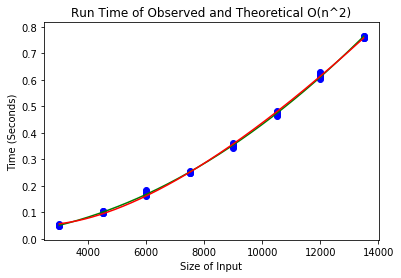

In [10]:
# possible x values
x = np.linspace(3000, 13500, 10500)

# regression line equation for worst case run time
lineWC = aWC + bWC * x + cWC * (x ** 2)

# regression line equation for expected run time
lineER = aER + bER * x + cER * x * np.log2(x)

plt.scatter(length, times, c = 'b')  # observed values plotted in blue
plt.plot(x, lineWC, c = 'g')  # plot regression line equation for worst case in green
plt.plot(x, lineER, c = 'r')  # plot regression line for expected run time in red
plt.xlabel('Size of Input')
plt.ylabel('Time (Seconds)')
plt.title('Run Time of Observed and Theoretical O(n^2)')
plt.show()

### Mean Squared Error
- mean squared error measures the squared distance between observed and theoretical values. A small mean squared error indicates observed and theoretical run times are similar
- the worst case time complexity for randomized quick sort obtains a MSE that is close to 0
- the expected run time for randomized quick sort obtains a MSE that is close to 0
- therefore, the worst case time complexity and the expected run time are good estimates
- we can estimate the run time of arrays length 3000 to 13,500 with the worst case run time of O(n^2) or the expected run time of O(nlog(n))

In [11]:
# output the worst case MSE
MSEwc = '{:10.9f}'.format(resultWC.mse_resid)
outputWC = ('The mean squared error of the equation for the worst case time complexity is {x}.').format(x = MSEwc)
print(outputWC)

# output the expected run time MSE
MSEer = '{:10.9f}'.format(resultER.mse_resid)
outputER = ('The mean squared error of the equation for the expected run time is {x}.').format(x = MSEer)
print(outputER)

'0.000038589'

## Conclusion
- run time of randomized quick sort for arrays of length 3000 to 13,500 can be estimated by the worst case O(n^2) or the expected run time O(nlog(n))
    - output for both equations are very similar in this range
- data obtained from sorting sample arrays supports this conclusion
    - on the scatterplot, observed values are very close to both theoretical trend lines
    - the mean squared error for both theoretical trend lines is close to 0